##pandas 1

In [230]:
import pandas as pd
import numpy as np

data = pd.read_csv('netflix_titles.csv')
data.iloc[np.r_[-5:0]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


файл предтсавляет из себя таблицу, содеражащую информацию о фильмах ТВ программ итд

In [231]:
print("количество строк в файле =", data.shape[0])
print("количество столбцов в файле в файле =", data.shape[1])

количество строк в файле = 7787
количество столбцов в файле в файле = 12


##pandas 2


In [232]:
print("уникальных категорий рейтинга",data['rating'].nunique())
print("объектов каждого типа \n", data["type"].value_counts() )
print("минимальный год релиза для объектов, попавших в таблицу", data['release_year'].min())


уникальных категорий рейтинга 14
объектов каждого типа 
 Movie      5377
TV Show    2410
Name: type, dtype: int64
минимальный год релиза для объектов, попавших в таблицу 1925


##pandas 3

In [233]:
values =  {"director": "", "cast": "", "country": ""}
data = data.fillna(value=values)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


##pandas 4

In [284]:
import datetime
print(data['date_added'].dtype)
data['date_added'] = pd.to_datetime(data['date_added'])
print(pd.DatetimeIndex(data['date_added']).year.value_counts().idxmax())

object
2019


c:\users\fastaki\desktop\pythonproject\venv\lib\site-packages\pandas\core\indexes\base.py:2023: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_unique
c:\users\fastaki\desktop\pythonproject\venv\lib\site-packages\pandas\core\indexes\base.py:3512: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = self._engine.get_indexer(target._get_engine_target())


##pandas 5

In [235]:
#movie в минутах
#tv show в сезонах

data["duration"] = data["duration"].apply(lambda x: int(x.split()[0]))

##pandas 6

In [236]:
from natsort import index_natsorted
top_dur = data.sort_values(by=['duration', 'release_year'], ascending=[False, True], na_position='first')
top_dur.iloc[np.r_[0:10]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
957,s958,Movie,Black Mirror: Bandersnatch,,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...
3694,s3695,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",,2020-05-21,1982,TV-PG,233,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...
5108,s5109,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",,2020-05-21,1984,TV-14,230,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...
5376,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,2019-12-31,1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...
3521,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,2021-01-10,2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ..."
3195,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,2018-10-01,2008,TV-14,214,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate..."
3282,s3283,Movie,Kabhi Khushi Kabhie Gham,Karan Johar,"Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan...",India,2020-04-01,2001,TV-14,209,"Dramas, International Movies",Years after his father disowns his adopted bro...
6507,s6508,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,2019,R,209,Dramas,Hit man Frank Sheeran looks back at the secret...


##pandas 7

In [237]:
mid_data = data.loc[(data['rating']=="TV-MA") & (data['release_year'] == 2018) & (data['type'] == 'TV Show')]

##pandas 8

In [238]:
mid_data = data.loc[(data["release_year"] >= 2010) & (data["release_year"] <= 2020)].groupby(by=["release_year"])["duration"].mean()
mid_data

release_year
2010    82.883041
2011    78.987952
2012    73.403670
2013    75.683019
2014    73.658683
2015    71.281716
2016    69.732123
2017    70.242574
2018    63.606250
2019    55.382530
2020    43.440092
Name: duration, dtype: float64

##pandas 9

In [239]:
from datetime import date
data.loc[data["title"]=="Supernatural", "duration"] = 16
data.loc[data["title"]=="Supernatural", "date_added"] = date.today()
data.loc[data["title"]=="Supernatural", "release_year"] = 2021

##pandas 10

In [240]:
new_data = data["country"].apply(lambda x: x.split(',')).explode('country')
new_data.value_counts()[0:2]




United States    2874
India             956
Name: country, dtype: int64

In [241]:

import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg'

In [242]:
##plt 1

<AxesSubplot:xlabel='release_year'>

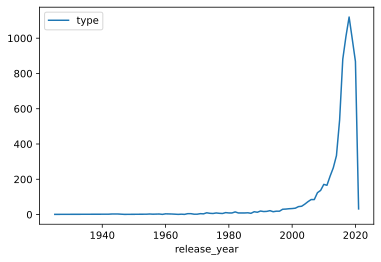

In [243]:
year = data.groupby(['release_year'])[['type']].count()
year.plot()

In [244]:
## plt 2

Text(0, 0.5, 'mean duration')

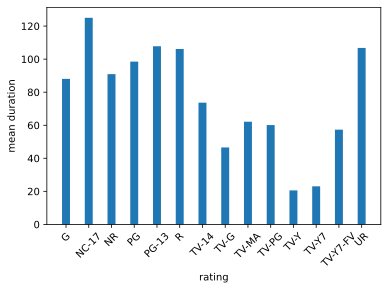

In [250]:
width = 0.35
ids = np.arange(1,15)
rating = data.groupby(['rating'])[['duration']].mean()
rating['duration']
idx = ['G','NC-17','NR','PG','PG-13','R','TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7','TV-Y7-FV','UR']
plt.bar(ids - width / 2, rating['duration'], width)
plt.xticks(ids - width / 2, idx, rotation=45)
plt.xlabel('rating')
plt.ylabel('mean duration')

In [251]:
##plt 3

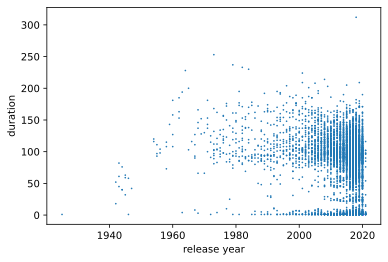

In [283]:
y = data['duration']
x =  data['release_year']
plt.ylabel('duration')
plt.xlabel('release year')
plt.scatter(x, y, 0.5)